<a href="https://colab.research.google.com/github/Nouran-Khallaf/Arabic-Readability-Corpus/blob/main/freetxt_thesawrws_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions
Before `run_all` kindly dowload and add those files [Dataset_5Reviews](https://github.com/Nouran-Khallaf/FreeTxt-Thesawrws_task/blob/main/5_Reviews.xlsx) and [MohaTaher_Arabic-stop-words](https://github.com/Nouran-Khallaf/FreeTxt-Thesawrws_task/blob/main/MohaTaher_arabic-stopwords.txt) to the colab content folder.

# Introduction
### This notebook is deticated to solve "FreeTxt/Thesawrws task" that is composed of six main steps as follows:
1. review two Python (preferably Python version 3) NLP libraries and choose one to perform the following task. In a comment at the beginning of the code you prepare, please briefly justify your choice of library for this task. 
2. use the chosen NLP library to tokenise text from a set of five travel related reviews, selected for example from TripAdvisor or Google reviews (you are welcome to choose other sources and the choice of natural language is yours).
3. pre-process the articles by removing noise e.g. HTML tags, stop words, punctuations and symbols.
4. add part of speech (POS) tags and Named Entity Recognition (NER) tags to the extracted text (to make sure that the taggers work with the chosen language).
5. use the tagged text and any other tools of your choice to score the sentiment expressed in the five travel reviews. You can choose document level, sentence level or another level for your sentiment scores.
6. provide a ranked list of the sentiment scores and texts you scored in the previous step.
7. please upload the code with comments online on GitHub by creating a private repository and sharing it with us (usernames: IgnatiusEzeani, drelhaj and perayson).
8. make sure the results from step 6 are displayed and uploaded for us to check and that the code is runnable. You can use a notebook format with all cells run if you wish.


# **1) Two Python NLP Libraries**


**## 1- Natural Language ToolKit (NLTK)**

Link: [https://www.nltk.org/](https://www.nltk.org/) — Official website for NLTK documentation.

Resource: [NLTK Book](https://www.nltk.org/book/) — Complete course on Natural Language Processing in Python using NLTK.

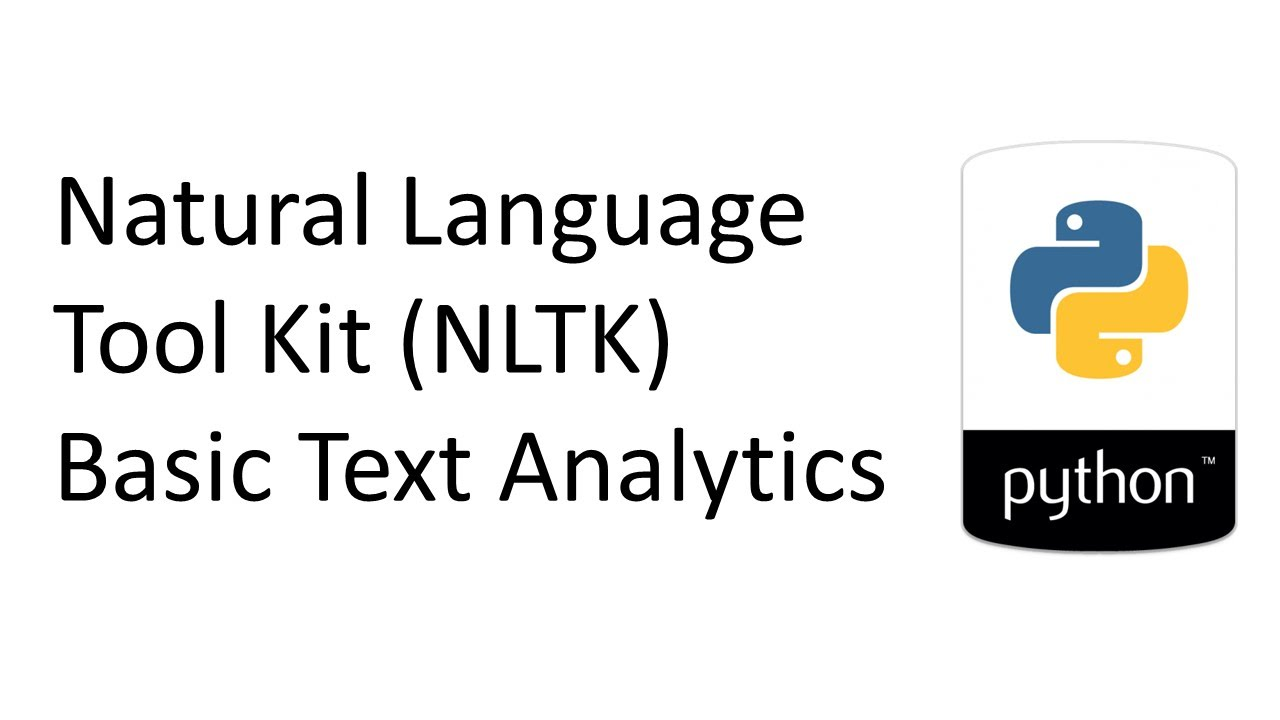

NLTK library was developed by *Steven Bird* and *Edward Loper* at the *University of Pennsylvania*. NLTK is one of the easiest and earliest libarirs used to build NLP programmes in python. which is widely considered the best Python library for NLP. NLTK is an essential library any NLP developer should know. It serves as an educational foundation for Python developers who are starting their machine learning carreer. It is suitable for students, educators, engineers, researchers, and industry professionals. Folowing step by step in the resource book that presents a practical introduction to programming for NLP.

NLTK supports tasks starting from basic tasks such as tokenization, lemmatization, stemming, chunking, parsing, semantic reasoning, and POS tagging to some more complex tasks as classification, and wrappers for industrial-strength NLP libraries. It also allows user to define your language rules as a finite-state transducer (FST) and applying the pre-developed functions. It offers a suite of open source data sets with over 100 corpora and lexical resources, such as WordNet, Web Text Corpus, NPS Chat, SemCor, and FrameNet. NLTK supports various languages, as well as named entities for multi language. 

NLTK is a free and open-source library that an be accessed in Python version 3.6 and above and available on Windows, Mac OS and Linux with plenty of tutorials to make your entry into the world of NLP smooth. NLTK limitations appears in the steep learning curve, it prefroms tasks slowly, and it dosenot support neural network models.
Despite these limitations and the development of other NLP libraries, many reserches still using NLTK to perform preprocessing for many languages. 


**## 2- CAMeL Tools**
Link: [https://github.com/CAMeL-Lab/camel_tools](https://github.com/CAMeL-Lab/camel_tools)

Reference: [https://aclanthology.org/2020.lrec-1.868/](https://aclanthology.org/2020.lrec-1.868/)

Documentation: [https://camel-tools.readthedocs.io/en/latest/](https://camel-tools.readthedocs.io/en/latest/)

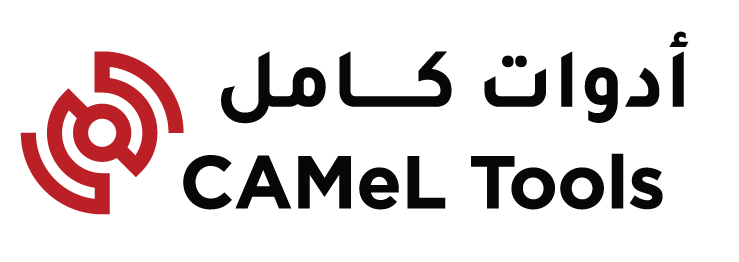

CAMel tools is an open-source toolkit for Arabic natural language processing in Python. It allows Arabic NLP tasks  such as pre-processing, morphological analysis, POS-tagging, dialect identification, named entity recognition and sentiment analysis. Also, it provides command-line interfaces
and application programming interfaces (APIs) to be embedded in different applications and tools.

This is one of the main easy to use NLP tools that supports Arabic and
Arabic dialect. CAMel tools it is a continum of years of reaserch to achieve a better analysis pereformance that deals with a highly morphological language as Arabic.

It should be highlighted that its pre-processing stage includes transliteration, unicode normalization, and letter noramlization.These functions are unique to Arabic. Hence, having a normalized text is very important when analysing Arabic. For instance, matching words with the same lemmas despite their orthographic mismatch form.



### **Hence, this notebook will use CAMel tools to accomplish the task. Sometimes I will use NLTK also to compare and justify using CAMel tools.**

###Before we continue completing the task we need first to download the tools that we will use.

### 1) Arabic NLP analysis toolkit 
1- Install CAMel Tools Python package. You can obtain the package by installing it using pip.

In [ ]:
%pip install camel-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2- Mount to a google drive to creat a directory and install all the datasets required.

**NOTE:** it needs at least 2.3GB of available space on your Google Drive to install all the CAMeL Tools data.

In [ ]:
from google.colab import drive
import os
drive.mount('/gdrive')
%mkdir /gdrive/MyDrive/camel_tools

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
mkdir: cannot create directory ‘/gdrive/MyDrive/camel_tools’: File exists


3- Tell CAMeL Tools to install the data in the newly created directory.

In [ ]:
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'
!export | camel_data -i all

No new packages will be installed.


**Note: For the second time running the CAMel Tools, just run the following set.**

In [ ]:
%pip install camel-tools

from google.colab import drive
import os

drive.mount('/gdrive')
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


###2) For the purpuse of data visualisation. 

*  Install Arabic word cloud `ar_wordcloude`
*  It is a tiny wrapper around wordcloud.WordCloud to support WordCloud with Arabic text.

In [ ]:
!pip install ar_wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 3) Pre-processing 


*   Install a Library to identify the ***emoji*** in any text. ` emoji`

*   Install a library to identify the ***stop words*** in any text. `nltk.download('stopwords')`
*   Install a library to identify the ***wordtokenisation*** in any text. `nltk.download('punkt')`



In [ ]:
## Get the emoji library
!pip install emoji
## Get the arabic Stop words list
import nltk
nltk.download('stopwords')
## Get the punctuation list
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#utilities
##read datasets
import pandas as pd
import numpy as np
import time
##plotting
import matplotlib.pyplot as plt
##visuailization
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud
#text processing & sentiment analysis
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

2. use the chosen NLP library to tokenise text from a set of five travel related reviews, selected for example from TripAdvisor or Google reviews (you are welcome to choose other sources and the choice of natural language is yours).


# **2) Select five Tripadvisor reviews and Tokenise the text**
The direct path to get ***Tripadvisor reviews*** is by scraping sepcific pages for hotel, city, resturant's reviews. This could be done by using `selenium` and `kora` libraries. Those libriries allows to find specific elements in webpages and extract the data. 

Taking into account that the task here specified only five reviews about travel which could be easily by manually selecting those reviews from the tripadvisor website.

However, I explaind here the first method for getting the reviews with automatic scraping as a refrence for a full data collection. After that I have manually selected five differnt reviews to enable showing various preprocessing issues and thier resolvation.




## Automatic scrapping
1- install the requried libraries `selenim` and `kora`

In [ ]:
## install the scrapping libraries
!pip install selenium
!pip install kora -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 5.3 MB/s 
     |████████████████████████████████| 358 kB 44.7 MB/s 
     |████████████████████████████████| 140 kB 48.1 MB/s 
     |████████████████████████████████| 58 kB 4.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


     |████████████████████████████████| 57 kB 2.4 MB/s 
     |████████████████████████████████| 1.6 MB 10.7 MB/s 


In [ ]:
#import the installed libraries to creat the webdriver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

2- Specify the ***URL*** of the reviews in any first page of tripadvisor reviews

Here, I sepcified an url for reviews about a palce in Hurghada city called the Marina in the red sea in Egypt.

In [ ]:
url = "https://www.tripadvisor.co.uk/Attraction_Review-g297549-d3806192-Reviews-Hurghada_Marina-Hurghada_Red_Sea_and_Sinai.html"

3- Specify which browser you will use, here I am using `Google Chrome`

In [ ]:
# Install the chrome web driver from selenium. 
!apt-get update 
!apt install chromium-chromedriver
from kora.selenium import wd
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get(url)

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [92.1 kB]
Hit:13 http://ppa.laun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


4- To visualise the Webdriver and make sure that we specified the right URL. this is done by recalling the webdriver which we named `wd`

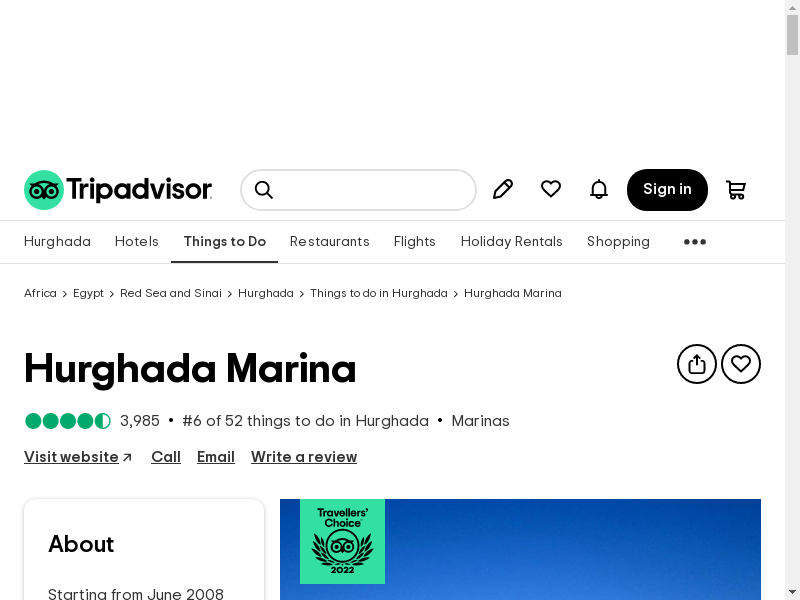

In [ ]:
wd

5- As we are intresetd in reviwers written in Arabic Language. We first need to specify the language filter in the website to Arabic. On tripAdvisor webpage we need to click the language button and choose Arabic menu-item-ar from a Listbox.

In [ ]:
##find the button and Click to open the languages listbox
wd.find_element(By.XPATH, '//*[@id="tab-data-qa-reviews-0"]/div/div[1]/span/div/div[2]/div/div/span[2]/span/div/div/button').click()
##sleep to give time to the browser to open the listbox
time.sleep(3)
## choose Arabic language by 'menu-item-ar' you can change the language code to specify any other language
wd.find_element(By.XPATH,'//*[@id="menu-item-ar"]').click()

6- imagine now that we have an open webpage showing Hurghada Marina reviews in Arabic. Now what we need to do is to extarct each review text along with its information such as, score, title, and user name.

In [ ]:
### creating lists to add the data per each review specefing (username, Title of the review, the review, and the score given)
name_list = []
titles_list = [] 
reviews_list = [] 
score_list = []
score_list_final = []

## the range is to specify how many pages you want to scrap, here, we are scrapping 50 pages
for i in range(0, 50):
  # Extract Usernames.
  ## XPATH could be extracted by inspect element in the HTML page using any browser to get the PATH for the specific element
  names = wd.find_elements(By.XPATH, "(//span[@class='biGQs _P fiohW fOtGX']/a)")
  for name in range(len(names)):
    if names[name].text =='':
      True
    else:
        name_list.append(names[name].text)
  # Extract review title.
  review_names = wd.find_elements(By.XPATH, "(//a[@class='BMQDV _F G- wSSLS SwZTJ FGwzt ukgoS']/span)") 
  for review in range(len(review_names)):
    titles_list.append(review_names[review].text)

  # Extract reviews.  
  reviews = wd.find_elements(By.XPATH, "(//div[@class='biGQs _P pZUbB KxBGd']/span)") 
  for review in range(len(reviews)):
    reviews_list.append(reviews[review].text) 
  # Extract scores.  
  scores = wd.find_elements(By.XPATH, "(//*[name() = 'svg'][contains(@class, 'UctUV d H0')][contains(@width, '88')])") 
  for score in range(len(scores)):
    ## here we extract the label from the svg image and get the value of the bubbles
    if  scores[score].get_attribute("aria-label")== '' :
      False
    else:
      bubble = scores[score].get_attribute("aria-label")
      ## only to extract the score which is the first element from the text '4 out of 5 bubbles'
      score_list.append(bubble[0])
  ## here to ignore the first elemnet that is always the overall reviews score
  score_list = score_list[1:]
  score_list_final.extend(score_list)
  score_list = []
  wd.find_element(By.XPATH, "//a[@class='BrOJk u j z _F wSSLS tIqAi unMkR']").click()
  ## add a pause to give time to load each page
  time.sleep(2)

  

7- Create the Dataset

combining all lists and convert to a pandas Dataframe.

In [ ]:
data =list( zip(name_list, titles_list, reviews_list, score_list_final))
reviews = pd.DataFrame(data,columns=['UserName', 'Title', 'Review','Score'])
reviews.head(10)

,UserName,Title,Review,Score
0,fox,الأقصر,مكان جميل جدا والاكل لذيذ خالص\nوالفيو كمان مم...,5
1,Yousef M,الغردقه مارينا,مطعم ويفز المارينا مكان رواع فيو رائع على البح...,5
2,fasoos,القاهرة,حاجة تحفة و ممتازة و شكل حضاري جدا و ديكورات م...,5
3,Hoda E,Nasr city,استمتعنا كثيرا في فندق ميركور و الغرف جميله و ...,5
4,Nancy A,مكان رائع,من الأماكن المفضله عندي كل مره ازور فيها الغرد...,5
5,Ahmed Elbadry,أسيوط,مارينا اليخوت ملئ بالحيوية والجمال به العديد م...,4
6,Mohammed S,مكان هادى,مكان جميل بس اسعار الكافيهات هناك غالية\nهو عب...,3
7,waleed mohamed,الغردقه,المرينه الجديده\n\nمكان جميل جدا\n\nفي كافيهات...,5
8,Moubarak Taghain,مكان جيد,مكان جديد\nذهبت له مرتين متعدد منتوع يوجد به ك...,3
9,fasoos,القاهرة,لقد زرت المرينا و كان مشهد البحر مع اليخوت اكث...,5


### 8- Save the scrapped Dataset to Csvfile
This file is avialable in the github repository under the same filename.

In [ ]:
reviews.to_csv('Hurgada_Marina_reviews.csv', index=False, header=True)

## Manual selection
As the purpose of this project was to examine an NLP tool for preprocessing and linguistic analysis of specific language, I choose to select 5 reviews that conatin different type of noise to show how the tool perform in detecting and processing them.

# The Dataset in use 

This file is avialable with the project in github repository under the name `5_Reviews.xlsx`

Upload the file first and then use pandas dataframe to read the excel file using `pd.read_excel`

In [16]:
Data=pd.read_csv('5_Reviews.xlsx')

Visualize the pandas Dataset
In the dataset each raw has 6 varablies [Type, Title, Review, Date, Info, score],

* **Type**: hotel, tower, city, and resturant
* **Title**: the title of the review
* **Review**: the review content
* **Date**: the date of the review
* **Info**: Solo traveller, Travelled with friends, Travelled with family
* **Score**: The score given by the user

In [19]:
Data

,type,Title,Review,date,info,score
0,hotel,صن رايز رويال مكادى فندق ينبض بالحياه,.فندق ينبض بالحياه .اولا الاستقبال اخص بالشكر ...,Feb-22,Travelled with family,4
1,hotel,اقامة اكثر من رائعة,مشفتش كدة فى اى فندق تانى ...الاكل ممتاز ومتن...,Oct-21,Travelled with friends,4
2,tower,🌹🌹 قمة الروعه 🌹🌹,كان يوم رائع جداً في برج خليفه اعلى و أجمل برج...,Mar-21,Travelled with family,4
3,city,دبي,مكان جميل جدا يتسم بالفخامة والعراقة واسلوب ا...,Dec-21,Travelled with family,5
4,resturant,مطعم وجبات سريعة عادي,في نظري أن مطاعم البيك مطاعم عادية، لا تقدم شي...,Aug-17,Travelled alone,3


## A) Sentence tokenisation
As the reviews may consist of more than one sentence, we may need to split each review into set of sentences.

Python does provide the `string.split()` method to tokenize.
Senetnce tokenisation is could be done by `split('[.،]+')`  specifying the full stop as a delimitar between sentences applied in the `Review` column.

In [ ]:
## add ['Review_sent_token'] column to the original dataset applying split('.')
Data['Review_sent_token'] = Data['Review'].apply(lambda x: re.split('[.،]+',x)) 

- To view the result of sentence tokenisation accesing the first review in the dataset


In [ ]:
Data['Review_sent_token'][0]

['',
 'فندق ينبض بالحياه ',
 'اولا الاستقبال اخص بالشكر مستر عمرو لحسن استقباله ',
 'أروع ما يميز الفندق مدى احترافيه العاملين به لاسعاد النزلاء ',
 'لايوجد اى تفرقه فى التعامل مع المصريين ',
 'فريق انيميشن على أعلى مستوى لمحاوله اسعاد النزلاء وبالاخص مستر سعيد ومستر نورى ',
 'الاكوا بارك معقوله وتناسب الأطفال ',
 'المطاعم جيده جدا والاكل متنوع وذو مذاق رائع ',
 'السناكس ممتازه ',
 'المشروبات جيده ',
 'الغرف جميله ولكن اثاثها متواضع ومساحه الجزء الخاص بالاستحمام صغيره جدا ',
 'الفندق يناسب الاسره وبالاخص الأطفال ',
 'الحفلات جميله وممتعه لجميع افراد الاسره ',
 'تم تقسيم الفندق إلى قسمين ',
 'النصف الأول وهوا المواجه للشاطىء وأصبح اسمه توكانا صن رايز ',
 'النصف الثاني وهو الخلفي وهو صن رايز رويال مكادى وبه الاكوابارك ',
 'يوجد اكثر من مسبح دافىء ',
 'الشاطيء جميل جدا ورملى ومن شده نقاء الماء تشاهد الاسماك من الشاطيء ',
 'يوجد بعض الانشطه على الشاطيء ',
 'انصح به بشده']

In [ ]:
str = "Hey, Copines is a good song; I like that song"

print(re.split('; |, |\*|\n', str))

['Hey', 'Copines is a good song', 'I like that song']


## B) Word tokenisation
1- Using either the defult `nltk.string.split()` function or `nltk.word_tokenize(string)` which both tokenize words by whitespace but it doesn't seperate punctuation from words.


In [ ]:
## add ['Review_word_token']  column to the original dataset applying split('')
Data['Review_word_token'] = Data['Review'].apply(lambda x: word_tokenize(x))

- To view the result of **NLTK word tokenisation** accesing the first review in the dataset

In [ ]:
Data['Review_word_token'] [0]

['.فندق',
 'ينبض',
 'بالحياه',
 '.اولا',
 'الاستقبال',
 'اخص',
 'بالشكر',
 'مستر',
 'عمرو',
 'لحسن',
 'استقباله',
 '.أروع',
 'ما',
 'يميز',
 'الفندق',
 'مدى',
 'احترافيه',
 'العاملين',
 'به',
 'لاسعاد',
 'النزلاء',
 '.لايوجد',
 'اى',
 'تفرقه',
 'فى',
 'التعامل',
 'مع',
 'المصريين',
 '.فريق',
 'انيميشن',
 'على',
 'أعلى',
 'مستوى',
 'لمحاوله',
 'اسعاد',
 'النزلاء',
 'وبالاخص',
 'مستر',
 'سعيد',
 'ومستر',
 'نورى',
 '.الاكوا',
 'بارك',
 'معقوله',
 'وتناسب',
 'الأطفال',
 '.المطاعم',
 'جيده',
 'جدا',
 'والاكل',
 'متنوع',
 'وذو',
 'مذاق',
 'رائع',
 '.السناكس',
 'ممتازه',
 '.المشروبات',
 'جيده',
 '.الغرف',
 'جميله',
 'ولكن',
 'اثاثها',
 'متواضع',
 'ومساحه',
 'الجزء',
 'الخاص',
 'بالاستحمام',
 'صغيره',
 'جدا',
 '.الفندق',
 'يناسب',
 'الاسره',
 'وبالاخص',
 'الأطفال',
 '.الحفلات',
 'جميله',
 'وممتعه',
 'لجميع',
 'افراد',
 'الاسره',
 '.تم',
 'تقسيم',
 'الفندق',
 'إلى',
 'قسمين',
 '.النصف',
 'الأول',
 'وهوا',
 'المواجه',
 'للشاطىء',
 'وأصبح',
 'اسمه',
 'توكانا',
 'صن',
 'رايز',
 '.النصف',
 'الثاني'

2- Using `camel_tools.tokenizers.word.simple_word_tokenize` that provides also a word tokenisation which strip the puncutation from the words. 

for example the word '.انصح','I advise.' [word at the end of sentence with pholostop] many systems would consider it as a diffrent token from 'انصح', 'I advise'. So that this feature allows a better word tokenistion and classification.

In [ ]:
from camel_tools.tokenizers.word import simple_word_tokenize
Data['Review_Camel_word_token'] = Data['Review'].apply(lambda x: simple_word_tokenize(x))

In [ ]:
Data['Review_Camel_word_token'] [0]

['.',
 'فندق',
 'ينبض',
 'بالحياه',
 '.',
 'اولا',
 'الاستقبال',
 'اخص',
 'بالشكر',
 'مستر',
 'عمرو',
 'لحسن',
 'استقباله',
 '.',
 'أروع',
 'ما',
 'يميز',
 'الفندق',
 'مدى',
 'احترافيه',
 'العاملين',
 'به',
 'لاسعاد',
 'النزلاء',
 '.',
 'لايوجد',
 'اى',
 'تفرقه',
 'فى',
 'التعامل',
 'مع',
 'المصريين',
 '.',
 'فريق',
 'انيميشن',
 'على',
 'أعلى',
 'مستوى',
 'لمحاوله',
 'اسعاد',
 'النزلاء',
 'وبالاخص',
 'مستر',
 'سعيد',
 'ومستر',
 'نورى',
 '.',
 'الاكوا',
 'بارك',
 'معقوله',
 'وتناسب',
 'الأطفال',
 '.',
 'المطاعم',
 'جيده',
 'جدا',
 'والاكل',
 'متنوع',
 'وذو',
 'مذاق',
 'رائع',
 '.',
 'السناكس',
 'ممتازه',
 '.',
 'المشروبات',
 'جيده',
 '.',
 'الغرف',
 'جميله',
 'ولكن',
 'اثاثها',
 'متواضع',
 'ومساحه',
 'الجزء',
 'الخاص',
 'بالاستحمام',
 'صغيره',
 'جدا',
 '.',
 'الفندق',
 'يناسب',
 'الاسره',
 'وبالاخص',
 'الأطفال',
 '.',
 'الحفلات',
 'جميله',
 'وممتعه',
 'لجميع',
 'افراد',
 'الاسره',
 '.',
 'تم',
 'تقسيم',
 'الفندق',
 'إلى',
 'قسمين',
 '.',
 'النصف',
 'الأول',
 'وهوا',
 'المواجه',
 'للشاطى

## 3- Pre-processing
this step involves clean the reviews and remove all noises from the text such as 
1. Emojis
2. HTML Links (<>..</>)
3. url Links(https//)
4. Punctuation marks
5. Stop words
6. Non-arabic words
7. Arabic Text normalisation

as we are working here with Arabic text and added step is to normalise Arabic text that means standerdise the orthographic forms of specific letters in arabic which may missmatched if wrongly written.

**NOTE: each step is done seperatly and performed on the result of the previous step**


### 1) Emojis

- It is important to remove emojis from data as it can sometimes create a problem with analysis further.

- Using the `emoji` libirary, applying `emoji.replace_emoji(string, '')`

In [ ]:
#check if there is any emoji and remove it
## add a ['Review_noemoji'] column to the data holds the the reviews cleaned from emojis
def remove_emoji(string):
    return emoji.replace_emoji(string, '')
Data['Review_noemoji'] = Data['Review'].apply(lambda x: remove_emoji(x))

- view the third review before and after applying the emoji cleaning to ensure the performence.

In [ ]:
Data['Review'][2]

'كان يوم رائع جداً في برج خليفه اعلى و أجمل برج في العالم ❤️❤️ انصح بالزياره شعور رائع في القمه ❤️❤️ هذه ثاني مرة اقوم بزيارة برج خليفة في دبي كانت الزيارة الاولى في ليلة رأس السنة الميلادية 2019 وكانت رائعة جداً حيث الالعاب النارية والعروض الجميلة كذلك الان مع مهرجان اكسبو المتعة اكثر !'

 - the ❤ is removed compeletly 

In [ ]:
Data['Review_noemoji'] [2]

'كان يوم رائع جداً في برج خليفه اعلى و أجمل برج في العالم  انصح بالزياره شعور رائع في القمه  هذه ثاني مرة اقوم بزيارة برج خليفة في دبي كانت الزيارة الاولى في ليلة رأس السنة الميلادية 2019 وكانت رائعة جداً حيث الالعاب النارية والعروض الجميلة كذلك الان مع مهرجان اكسبو المتعة اكثر !'

- For some other cases we may use an emoji conversion to a text as the emoji holds sentimnet information that we may use later if we are building a sentimnet analyser.
- This could be done by using `emoji.demojize(string)`

In [ ]:
#Convert emoji to a represntative text 
def remove_emoji(string):
    return emoji.demojize(string)
Data['Review_emojitext'] = Data['Review'].apply(lambda x: remove_emoji(x))

- In previous example the ❤ is replaced by :red_heart:

In [ ]:
Data['Review_emojitext'] [2]

'كان يوم رائع جداً في برج خليفه اعلى و أجمل برج في العالم :red_heart::red_heart: انصح بالزياره شعور رائع في القمه :red_heart::red_heart: هذه ثاني مرة اقوم بزيارة برج خليفة في دبي كانت الزيارة الاولى في ليلة رأس السنة الميلادية 2019 وكانت رائعة جداً حيث الالعاب النارية والعروض الجميلة كذلك الان مع مهرجان اكسبو المتعة اكثر !'

### 2) HTML tags 

- It is also important to remove HTML tags and both removing HTML tags and links should proceeds removing the punctuations as they consists of punctuations and letters.
- It depends on the HTML tag itself and if the task is to keep the text inside the tag or it needs to be removed as whole.
- Here, we did not have an example in the data that has xml tags. However, the following cells shows the two process.
1. Example one delete whole html tag, 

- text to keep as original `<span> the text </span>` ----> text to keep as original
- The best way to identify the tags is by using `regex`   

In [ ]:
### remove HTML tags with the text inside
## import regex
import re   
Data['Review_XML'] = Data.Review_noemoji.apply(lambda x: re.sub('<[^>]*>', '', x))

2. Example two keep the text inside the html tag, 

- text to keep as original `<span> the text </span>` ----> text to keep as original `the text`

In [ ]:
### remove HTML tags and keep the text inside 
Data['Review_XML_2']= Data.Review_noemoji.apply(lambda x: re.sub('<[^<]+?>', '', x))

### 3) Links - urls

- also using regex to find any url in the data and remove it.

In [ ]:
Data['Review_noLink']= Data.Review_XML.apply(lambda x: re.sub('https\S+', '', x))

### 4) Punctuation marks

- It is also important to punctuation marks from data as explained eariler in matching the tokens and word lemmas.

- Using the `nltk.string.punctuation` = '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'

In [ ]:
# Remove puntiation
import string
def preprocess_punc(sent):
    x="".join([i for i in sent if i not in string.punctuation])
    ## lower case is not a feature in arabic language however i keep it to be genertic 
    return x.lower()

Data['Review_punc'] = Data.Review_noLink.apply(lambda x: preprocess_punc(x))

- viewing before and after all punctuations as appeared in the following review in removing the full stop (the dot) `.`

In [ ]:
Data['Review'][0]

'.فندق ينبض بالحياه .اولا الاستقبال اخص بالشكر مستر عمرو لحسن استقباله .أروع ما يميز الفندق مدى احترافيه العاملين به لاسعاد النزلاء .لايوجد اى تفرقه فى التعامل مع المصريين .فريق انيميشن على أعلى مستوى لمحاوله اسعاد النزلاء وبالاخص مستر سعيد ومستر نورى .الاكوا بارك معقوله وتناسب الأطفال .المطاعم جيده جدا والاكل متنوع وذو مذاق رائع .السناكس ممتازه .المشروبات جيده .الغرف جميله ولكن اثاثها متواضع ومساحه الجزء الخاص بالاستحمام صغيره جدا .الفندق يناسب الاسره وبالاخص الأطفال .الحفلات جميله وممتعه لجميع افراد الاسره .تم تقسيم الفندق إلى قسمين .النصف الأول وهوا المواجه للشاطىء وأصبح اسمه توكانا صن رايز .النصف الثاني وهو الخلفي وهو صن رايز رويال مكادى وبه الاكوابارك .يوجد اكثر من مسبح دافىء .الشاطيء جميل جدا ورملى ومن شده نقاء الماء تشاهد الاسماك من الشاطيء .يوجد بعض الانشطه على الشاطيء .انصح به بشده'

In [ ]:
Data['Review_punc'][0]

'فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مستر عمرو لحسن استقباله أروع ما يميز الفندق مدى احترافيه العاملين به لاسعاد النزلاء لايوجد اى تفرقه فى التعامل مع المصريين فريق انيميشن على أعلى مستوى لمحاوله اسعاد النزلاء وبالاخص مستر سعيد ومستر نورى الاكوا بارك معقوله وتناسب الأطفال المطاعم جيده جدا والاكل متنوع وذو مذاق رائع السناكس ممتازه المشروبات جيده الغرف جميله ولكن اثاثها متواضع ومساحه الجزء الخاص بالاستحمام صغيره جدا الفندق يناسب الاسره وبالاخص الأطفال الحفلات جميله وممتعه لجميع افراد الاسره تم تقسيم الفندق إلى قسمين النصف الأول وهوا المواجه للشاطىء وأصبح اسمه توكانا صن رايز النصف الثاني وهو الخلفي وهو صن رايز رويال مكادى وبه الاكوابارك يوجد اكثر من مسبح دافىء الشاطيء جميل جدا ورملى ومن شده نقاء الماء تشاهد الاسماك من الشاطيء يوجد بعض الانشطه على الشاطيء انصح به بشده'

### 5) Stop Words

- Here, we need first to specify the list of the Arabic stop words.
- There is two Arabic stop word list, the first one is stored in `nltk.stopwords('arabic')` with **754** stop word, and the second one is from a resercher claimed he combined diferent arabic wordlists and this can be retrived from [mohataher/arabic-stop-words](https://github.com/mohataher/arabic-stop-words) consists of **751** stop word.
- I choose to combine both lists to creat a mereged list contains all avialable Arabic stop words with **857** stop words.

In [ ]:
## read the arabic-stopwords text
## this file is avialable on the repository under the name 'MohaTaher_arabic-stopwords.txt'
with open('MohaTaher_arabic-stopwords.txt', 'r') as file:
    stop_words = file.read()
    stop_words=list(stop_words.split('\n'))
## Creat the stop words list based on the nltk.stopwords and avaliable Arabic-list   
NLTK_stop_words=stopwords.words('arabic')

- check the length of each list.

In [ ]:
print(f'Mohamed taher stop words list length:',len(stop_words))
print(f'NLTK stop words list length:',len(NLTK_stop_words))

Mohamed taher stop words list length: 751
NLTK stop words list length: 754


- combine the two lists and desplay the length.

In [ ]:
Arabic_stop_words = list(set(stop_words + NLTK_stop_words))
print(f'Arabic stop words list length:', len(Arabic_stop_words))

Arabic stop words list length: 857


In [ ]:
def preprocess_stopwords(sent):
    x=" ".join([i for i in sent.split() if i not in Arabic_stop_words])
    return x
## add a ['Review_clean'] column to the data holds the the reviews cleaned from stopwords
Data['Review_stopwords']= Data.Review_punc.apply(lambda x:preprocess_stopwords(x))

In [ ]:
Data['Review'][0]

'.فندق ينبض بالحياه .اولا الاستقبال اخص بالشكر مستر عمرو لحسن استقباله .أروع ما يميز الفندق مدى احترافيه العاملين به لاسعاد النزلاء .لايوجد اى تفرقه فى التعامل مع المصريين .فريق انيميشن على أعلى مستوى لمحاوله اسعاد النزلاء وبالاخص مستر سعيد ومستر نورى .الاكوا بارك معقوله وتناسب الأطفال .المطاعم جيده جدا والاكل متنوع وذو مذاق رائع .السناكس ممتازه .المشروبات جيده .الغرف جميله ولكن اثاثها متواضع ومساحه الجزء الخاص بالاستحمام صغيره جدا .الفندق يناسب الاسره وبالاخص الأطفال .الحفلات جميله وممتعه لجميع افراد الاسره .تم تقسيم الفندق إلى قسمين .النصف الأول وهوا المواجه للشاطىء وأصبح اسمه توكانا صن رايز .النصف الثاني وهو الخلفي وهو صن رايز رويال مكادى وبه الاكوابارك .يوجد اكثر من مسبح دافىء .الشاطيء جميل جدا ورملى ومن شده نقاء الماء تشاهد الاسماك من الشاطيء .يوجد بعض الانشطه على الشاطيء .انصح به بشده'

In [ ]:
Data['Review_stopwords'][0]

'فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مستر عمرو لحسن استقباله أروع يميز الفندق مدى احترافيه العاملين لاسعاد النزلاء لايوجد اى تفرقه التعامل المصريين فريق انيميشن أعلى مستوى لمحاوله اسعاد النزلاء وبالاخص مستر سعيد ومستر نورى الاكوا بارك معقوله وتناسب الأطفال المطاعم جيده والاكل متنوع وذو مذاق رائع السناكس ممتازه المشروبات جيده الغرف جميله اثاثها متواضع ومساحه الجزء الخاص بالاستحمام صغيره الفندق يناسب الاسره وبالاخص الأطفال الحفلات جميله وممتعه لجميع افراد الاسره تقسيم الفندق قسمين النصف الأول وهوا المواجه للشاطىء وأصبح اسمه توكانا صن رايز النصف الخلفي صن رايز رويال مكادى وبه الاكوابارك يوجد مسبح دافىء الشاطيء جميل ورملى شده نقاء الماء تشاهد الاسماك الشاطيء يوجد الانشطه الشاطيء انصح بشده'

### 6) Non-Arabic words
- This allows to remove english or any latin symbols from the Arabic text using regex.

In [ ]:
## add a ['Review_nonArabic'] column to the data holds the the reviews cleaned from latin characters
Data['Review_nonArabic']= Data.Review_stopwords.apply(lambda x:re.sub('[a-zA-Z0-9_]|#|', '', x))

- To view the second review that has an English sentence `'night shows'` and the result after applying removing latin characters.

In [ ]:
Data['Review'][1]

'\xa0مشفتش كدة فى اى فندق تانى ...الاكل ممتاز ومتنوع المطاعم المتخصصة ممتازة وخصوصا مطعم بدوية الاكل رائع والمطعم الصينى الفندق رائع و مريح جدا و الشاطئ جميل و الخدمه ممتازة مقابل السعر و الغرف نظيفة وnight shows ممتعه و غير تقليديه و الطعام جميل و متنوع بالاخص المطعم الايطالى الاكل ذو جوده عاليه و مذاق رائع و الخدمه ممتازه و الوجوه بشوشه و خصوصا مستر بولس و مستر أبراهيم  بقيادة الشيف احمد قمة فى الذوق والاحترام والبشاشة والابتسامة الجميلة والمهارة فى صنع الاكل اليابانى وطبعا لو هتكلم عن الشطارة يبقى لازم الشيف سيد ملك الفطير تاكل منة احلة فطيرة والانيميشن تيم مميز جدا جدا وخصوصا كيمو والرسبيشن الاستاذ سيد حنفى ومحمد صبحى ودود جدا جدا ولو كان ممكن كنت ذكرت اسم كل واحد فى الفندق دة وعملتلة شكر خاص ولازم اتكلم عن النظافة والاهتمام بكل حاجة سواء صغيرة او كبيرة شكرا فعلا على الاجازة الرائعة دى وان شاء الله هاجى تانى انا والعائلة'

- Here, the sentence `'night shows'` doesnot appear in the processed text.

In [ ]:
Data['Review_nonArabic'][1]

'مشفتش كدة اى فندق تانى الاكل ممتاز ومتنوع المطاعم المتخصصة ممتازة وخصوصا مطعم بدوية الاكل رائع والمطعم الصينى الفندق رائع مريح الشاطئ جميل الخدمه ممتازة السعر الغرف نظيفة و  ممتعه تقليديه الطعام جميل متنوع بالاخص المطعم الايطالى الاكل جوده عاليه مذاق رائع الخدمه ممتازه الوجوه بشوشه خصوصا مستر بولس مستر أبراهيم بقيادة الشيف احمد قمة الذوق والاحترام والبشاشة والابتسامة الجميلة والمهارة صنع الاكل اليابانى وطبعا هتكلم الشطارة يبقى لازم الشيف سيد ملك الفطير تاكل منة احلة فطيرة والانيميشن تيم مميز وخصوصا كيمو والرسبيشن الاستاذ سيد حنفى ومحمد صبحى ودود ممكن كنت ذكرت اسم الفندق دة وعملتلة شكر خاص ولازم اتكلم النظافة والاهتمام بكل حاجة سواء صغيرة كبيرة شكرا فعلا الاجازة الرائعة دى شاء الله هاجى تانى انا والعائلة'

## 7) Arabic text normalisation

- Arabic text normalisation is an important step and lately it is avialable through CAMeL Tools using various letters normalisation.

In [ ]:
##Data Normalisation
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
def data_normalisation(sent):
  # Normalize alef variants to 'ا'
  sent_norm = normalize_alef_ar(sent)
  # Normalize alef maksura 'ى' to yeh 'ي'
  sent_norm = normalize_alef_maksura_ar(sent_norm)
  # Normalize teh marbuta 'ة' to heh 'ه'
  sent_norm = normalize_teh_marbuta_ar(sent_norm)
  return sent_norm
## add a ['Review_clean'] column to the data holds the the reviews cleaned from all noise
Data['Review_clean'] = Data.Review_nonArabic.apply(lambda row : data_normalisation(row))

- Here, to view the review before and after the normalisation. that showed it is working well.

In [ ]:
Data['Review'][0]

'.فندق ينبض بالحياه .اولا الاستقبال اخص بالشكر مستر عمرو لحسن استقباله .أروع ما يميز الفندق مدى احترافيه العاملين به لاسعاد النزلاء .لايوجد اى تفرقه فى التعامل مع المصريين .فريق انيميشن على أعلى مستوى لمحاوله اسعاد النزلاء وبالاخص مستر سعيد ومستر نورى .الاكوا بارك معقوله وتناسب الأطفال .المطاعم جيده جدا والاكل متنوع وذو مذاق رائع .السناكس ممتازه .المشروبات جيده .الغرف جميله ولكن اثاثها متواضع ومساحه الجزء الخاص بالاستحمام صغيره جدا .الفندق يناسب الاسره وبالاخص الأطفال .الحفلات جميله وممتعه لجميع افراد الاسره .تم تقسيم الفندق إلى قسمين .النصف الأول وهوا المواجه للشاطىء وأصبح اسمه توكانا صن رايز .النصف الثاني وهو الخلفي وهو صن رايز رويال مكادى وبه الاكوابارك .يوجد اكثر من مسبح دافىء .الشاطيء جميل جدا ورملى ومن شده نقاء الماء تشاهد الاسماك من الشاطيء .يوجد بعض الانشطه على الشاطيء .انصح به بشده'

In [ ]:
Data['Review_clean'][0]

'فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مستر عمرو لحسن استقباله اروع يميز الفندق مدي احترافيه العاملين لاسعاد النزلاء لايوجد اي تفرقه التعامل المصريين فريق انيميشن اعلي مستوي لمحاوله اسعاد النزلاء وبالاخص مستر سعيد ومستر نوري الاكوا بارك معقوله وتناسب الاطفال المطاعم جيده والاكل متنوع وذو مذاق رائع السناكس ممتازه المشروبات جيده الغرف جميله اثاثها متواضع ومساحه الجزء الخاص بالاستحمام صغيره الفندق يناسب الاسره وبالاخص الاطفال الحفلات جميله وممتعه لجميع افراد الاسره تقسيم الفندق قسمين النصف الاول وهوا المواجه للشاطيء واصبح اسمه توكانا صن رايز النصف الخلفي صن رايز رويال مكادي وبه الاكوابارك يوجد مسبح دافيء الشاطيء جميل ورملي شده نقاء الماء تشاهد الاسماك الشاطيء يوجد الانشطه الشاطيء انصح بشده'

 - plot WordClouds for the reviews after cleaning the text

**NOTE: most of the displayed words employs positive conotation which will proved later in the sentiment analysis** 

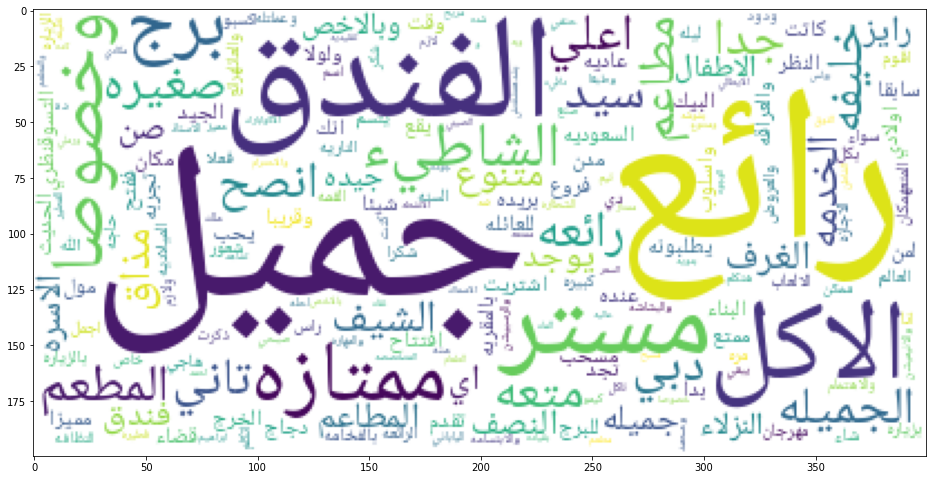

In [ ]:
awc = ArabicWordCloud(background_color="white")
plt.figure(figsize = (16,16))
wc_ar = awc.from_text(u''.join(Data['Review_clean']))
plt.imshow(wc_ar)

## 4) POS tagging and NER

### A) POS tagging
- for Arabic language CAMel tools provides a tagger which has a disambiguator that select the best pos tag for a word based on the context it appears in.
- we need fist to import the tagger `MLEDisambiguator`
- The POS tagger require the text to be word tokenised. Here I used CAMel.simple_word_tokenize.
- CAMel provides more than 8 feature for each word, I selected three main to get the Lemma (`lex`) , diacratisation (`dia`), and Pos_tag (pos)

In [ ]:
## Create Lemmatizer.
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
mle = MLEDisambiguator.pretrained()

def lemmatizing(text):
    # The disambiguator expects pre-tokenized text
    text = simple_word_tokenize(text)
    disambig = mle.disambiguate(text)
    # features from the top analysis of each disambiguated word into seperate lists.
    diacritized = [d.analyses[0].analysis['diac'] for d in disambig]
    pos_tags = [d.analyses[0].analysis['pos'] for d in disambig]
    lemmas = [d.analyses[0].analysis['lex'] for d in disambig]
    word = text
    return pd.Series({ 'word': ' '.join(text),'diacritized': ' '.join(diacritized), 'lemmas': ' '.join(lemmas),'pos_tags':' '.join(pos_tags)})
##Creat a Dataframe containing the lemma, diacratised words and the pos tags
pos = Data.Review_clean.apply(lambda x:lemmatizing(x))

- view the result of the pos tagging as a whole.

In [ ]:
pos

,word,diacritized,lemmas,pos_tags
0,فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مس...,فُنْدُقِ يَنْبُض بِالحَياة أَوَّلاً الاِسْتِقْ...,فُنْدُق نَبَض حَياة أَوَّل ٱِسْتِقْبال خَصّ شُ...,noun verb noun adj noun verb noun noun_prop no...
1,مشفتش كده اي فندق تاني الاكل ممتاز ومتنوع المط...,مشفتش كَدّه أَيّ فُنْدُقِ تَأَنِّي الأَكْل مُم...,مشفتش كَدّ أَيّ فُنْدُق تَأَنِّي أَكْل مُمْتاز...,noun_prop noun noun_quant noun noun noun adj a...
2,رائع جداً برج خليفه اعلي اجمل برج العالم انصح ...,رائِعٌ جِدّاً بُرْج خَلِيفَة أَعْلَى أَجْمَلِ ...,رائِع جِدّ بُرْج خَلِيفَة أَعْلَى أَجْمَل بُرْ...,adj noun noun_prop noun adj noun noun_prop nou...
3,مكان جميل يتسم بالفخامه والعراقه واسلوب البناء...,مَكانٍ جَمِيل يَتَّسِم بِالفَخامَة وَالعَراقَة...,مَكان جَمِيل ٱِتَّسَم فَخامَة عَراقَة أُسْلُوب...,noun noun_prop verb noun noun noun noun noun v...
4,نظري مطاعم البيك مطاعم عاديه ، تقدم شيئا مميزا...,نَظَرِي مَطاعِمِ أُلَبِّيكَ مَطاعِمِ عادِيهِ ،...,نَظَر مَطْعَم لَبَّى مَطْعَم عادِي ، تَقَدَّم ...,noun noun verb noun noun punc verb noun adj pu...


- concatinating each word with its analysis to make it easier to check the performance of the choosed tagger.


In [ ]:
for x in zip(pos.word[0].split(),pos.diacritized[0].split(),pos.lemmas[0].split(), pos.pos_tags[0].split(), ):
  print(x)

('فندق', 'فُنْدُقِ', 'فُنْدُق', 'noun')
('ينبض', 'يَنْبُض', 'نَبَض', 'verb')
('بالحياه', 'بِالحَياة', 'حَياة', 'noun')
('اولا', 'أَوَّلاً', 'أَوَّل', 'adj')
('الاستقبال', 'الاِسْتِقْبالِ', 'ٱِسْتِقْبال', 'noun')
('اخص', 'أَخُصّ', 'خَصّ', 'verb')
('بالشكر', 'بِالشُكْر', 'شُكْر', 'noun')
('مستر', 'مستر', 'مستر', 'noun_prop')
('عمرو', 'عَمْرو', 'عَمْرو', 'noun_prop')
('لحسن', 'لِحُسْنِ', 'حُسْن', 'noun')
('استقباله', 'اِسْتِقْبالِهِ', 'ٱِسْتِقْبال', 'noun')
('اروع', 'أَرْوَعُ', 'أَرْوَع', 'noun')
('يميز', 'يُمَيِّز', 'مَيَّز', 'verb')
('الفندق', 'الفُنْدُقِ', 'فُنْدُق', 'noun')
('مدي', 'مَدَى', 'مَدَى', 'noun')
('احترافيه', 'اِحْتِرافَيْهِ', 'ٱِحْتِراف', 'noun')
('العاملين', 'العامِلِينَ', 'عامِل', 'adj')
('لاسعاد', 'لاسعاد', 'لاسعاد', 'noun_prop')
('النزلاء', 'النُزَلاء', 'نَزِيل', 'noun')
('لايوجد', 'لايوجد', 'لايوجد', 'noun_prop')
('اي', 'أَيّ', 'أَيّ', 'noun_quant')
('تفرقه', 'تُفَرِّقه', 'فَرَّق', 'verb')
('التعامل', 'التَعامُلِ', 'تَعامُل', 'noun')
('المصريين', 'المِصْرِيِّينَ', 'مِ

## B) Arabic NER
- CAMel provides a pretrained Named Entity Recognition model which I have comapred it berfor with other avialable Arabic NERs and it proved its performance.
- It provides the four main classes: Location (LOC), Miscellaneous (MISC), Organization (ORG), and Person (PERS). 

In [ ]:
from camel_tools.ner import NERecognizer

ner = NERecognizer.pretrained()
def NER(text):
    # The disambiguator expects pre-tokenized text
    sentence = simple_word_tokenize(text)
    labels = ner.predict_sentence(sentence)
    return pd.Series({ 'words': ' '.join(sentence),'labels': ' '.join(labels)})
##Creat a Dataframe containing the word with its NER Tag
NER = Data.Review_clean.apply(lambda x:NER(x))

- view the result of the NER tagging as a whole.

In [ ]:
NER

,words,labels
0,فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مس...,O O O O O O O O B-PERS O O O O O O O O O O O O...
1,مشفتش كده اي فندق تاني الاكل ممتاز ومتنوع المط...,O O O O O O O O O O O O O O O O O O O O O O O ...
2,رائع جداً برج خليفه اعلي اجمل برج العالم انصح ...,O O O I-MISC O O O O O O O O O O O O O I-MISC ...
3,مكان جميل يتسم بالفخامه والعراقه واسلوب البناء...,O O O O O O O O O O O O O O O O O O O O O O O ...
4,نظري مطاعم البيك مطاعم عاديه ، تقدم شيئا مميزا...,O O B-ORG O O O O O O O O O O O O O O O O O O ...


In [ ]:
for x in zip(NER.words[0].split(),NER.labels[0].split()):
  print (x)

('فندق', 'O')
('ينبض', 'O')
('بالحياه', 'O')
('اولا', 'O')
('الاستقبال', 'O')
('اخص', 'O')
('بالشكر', 'O')
('مستر', 'O')
('عمرو', 'B-PERS')
('لحسن', 'O')
('استقباله', 'O')
('اروع', 'O')
('يميز', 'O')
('الفندق', 'O')
('مدي', 'O')
('احترافيه', 'O')
('العاملين', 'O')
('لاسعاد', 'O')
('النزلاء', 'O')
('لايوجد', 'O')
('اي', 'O')
('تفرقه', 'O')
('التعامل', 'O')
('المصريين', 'O')
('فريق', 'O')
('انيميشن', 'B-ORG')
('اعلي', 'O')
('مستوي', 'O')
('لمحاوله', 'O')
('اسعاد', 'O')
('النزلاء', 'O')
('وبالاخص', 'O')
('مستر', 'O')
('سعيد', 'B-PERS')
('ومستر', 'O')
('نوري', 'I-PERS')
('الاكوا', 'B-ORG')
('بارك', 'I-ORG')
('معقوله', 'O')
('وتناسب', 'O')
('الاطفال', 'O')
('المطاعم', 'O')
('جيده', 'O')
('والاكل', 'O')
('متنوع', 'O')
('وذو', 'O')
('مذاق', 'O')
('رائع', 'O')
('السناكس', 'B-MISC')
('ممتازه', 'O')
('المشروبات', 'O')
('جيده', 'O')
('الغرف', 'O')
('جميله', 'O')
('اثاثها', 'O')
('متواضع', 'O')
('ومساحه', 'O')
('الجزء', 'O')
('الخاص', 'O')
('بالاستحمام', 'O')
('صغيره', 'O')
('الفندق', 'O')
('يناسب

- **NOTE: after maual analysis of both CAMeL pos tagger and NER results showed a very high performance in Arabic language anlysis ** 

## 5) Sentiment analysis
- like other ongoing many NLP research its techniques have moved away from manually hand-crafted rules towards deep learning techniques.Either by applying
word embedding, or contextualised embedding such as **BERT**.

- sentiment analysis task involves classification of a text against binary criteria [positive and negative] or three classes [positive, nuteral, negative]. nuteral here referring to the sentences that have contadiction inside that the system can not decide.

- Further, CAMel tool provides a **BERT** Sentiment Analysis (SA) model  for either the Arabic Dialects(DA) for Arabic Modern standard language (MSA). 
- As the reviews are not formal language which are written from different Arabs visting the same place it is better to employ the dialectal Arabic model. DA model is uploaded on [Huggingface](CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment)  and easy to deploy.
-The Dialectal Arabic model (DA) was fine-tuned uisng ASTD, ArSAS, and SemEval datasets. [reference: The Interplay of Variant, Size, and Task Type in Arabic Pre-trained Language Models](https://arxiv.org/abs/2103.06678)

- CAMeL BERT DA provides sentiment analysis of  [positive,nuteral, negative], as well as a score for the positivity and negativity. These scores will be in use when analys sentence per sentence.
 

1- convert the scores as a reference to negative if the score is less than 4 points. and assign positive to the reviews with score equal or more than 4 points.

In [ ]:
## convert scores to Positive vs. Negative
def getAnalysis(score):
 if score < 4:
    return 'Negative'
 else:
    return 'Positive'

Data['sentiment'] = Data['score'].apply(getAnalysis)

2- creat a subset data frame `Data_sentiment` of the data with the final cleaned text not the tagged as the sentiment analyser requires the data in a sentence format to apply BERT.

In [ ]:
Data_sentiment = Data[['Review_clean','score', 'sentiment' ]]
Data_sentiment

,Review_clean,score,sentiment
0,فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مس...,4,Positive
1,مشفتش كده اي فندق تاني الاكل ممتاز ومتنوع المط...,4,Positive
2,رائع جداً برج خليفه اعلي اجمل برج العالم انصح ...,4,Positive
3,مكان جميل يتسم بالفخامه والعراقه واسلوب البناء...,5,Positive
4,نظري مطاعم البيك مطاعم عاديه، تقدم شيئا مميزا،...,3,Negative


- The data is composed of *four* positive reviews and one negative.

In [ ]:
Data['sentiment'].value_counts()

Positive    4
Negative    1
Name: sentiment, dtype: int64

##`**Document level**`
3-  apply the sentiment analyser on the reviews as a whole.

In [ ]:
from camel_tools.sentiment import SentimentAnalyzer
t = time.time()
sa = SentimentAnalyzer.pretrained()
def sentiment(sentences):
  sentiments = sa.predict(sentences)
  return sentiments
pred = Data_sentiment['Review_clean'].apply(lambda x:sentiment(x))

print(f'Prediction complete.')
print(f'Time Elapsed: {round(time.time()-t)} seconds')

Prediction complete.
Time Elapsed: 5 seconds


- add the prediction as a column in the `Data_sentiment`

In [ ]:
import itertools
merged = list(itertools.chain(*pred))
Data_sentiment ['pred']= merged

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- view the `Data_sentiment` and compare the original sentimnet retrived from the website against the prediction value.

In [ ]:
Data_sentiment

,Review_clean,score,sentiment,pred
0,فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مس...,4,Positive,positive
1,مشفتش كده اي فندق تاني الاكل ممتاز ومتنوع المط...,4,Positive,positive
2,رائع جداً برج خليفه اعلي اجمل برج العالم انصح ...,4,Positive,positive
3,مكان جميل يتسم بالفخامه والعراقه واسلوب البناء...,5,Positive,positive
4,نظري مطاعم البيك مطاعم عاديه، تقدم شيئا مميزا،...,3,Negative,positive


4- Error analysis

- In the data_sentiment, the original sentiment value of the last review with the index [negative] contradict with the predictive value [positive]
- reviweing the arabic text showed that it is not clear to be classified as a negtive review and it contain 5 setences only one of which has a negative conatation.

In [ ]:
Data_sentiment.Review_clean[4]

'نظري مطاعم البيك مطاعم عاديه، تقدم شيئا مميزا، وخصوصا انك تجد عنده دجاج مسحّب، ولولا اولادي يطلبونه اشتريت الجيد لمن يحب المطعم بدا افتتاح فروع مدن السعوديه، ففتح سابقا بريده، وقريبا الخرج'

5- Print the evaluation metrics for the dataset
- convert the Sentiment and predictions to binary in order to get the classificatin report and the accuracy measures.

In [ ]:
Data_sentiment['Label'] = pd.factorize( Data_sentiment['sentiment'])[0]
Data_sentiment ['pred_Label']= pd.factorize(Data_sentiment['pred'])[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### **The results in the classification report showes weighted average P = 0.64 , R = 0.71, and F1-measure =0.71 with 0.80 accuracy**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Data_sentiment.Label, Data_sentiment.pred_Label))
print(f"Accuracy score :  {accuracy_score(Data_sentiment.Label, Data_sentiment.pred_Label)}")

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Accuracy score :  0.8


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6) Sentiment scores ranking

- In order to get the actual scores of the sentiment analysis, CAMel tools requires install transformers to access the` bert-base-arabic` pipline model.

In [ ]:
!pip install transformers>=3.5.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.4.3 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


- get the scores of each sentiment analysis.

In [ ]:
from transformers import pipeline
sa = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment')
def sentiment_score(sentences):
  sentiments = sa(sentences)
  for x in range (len(sentiments)) :
      scores=(list(sentiments[x].values()))
  return pd.Series(scores,index=['Label','Score'])
sentiment_score = Data_sentiment['Review_clean'].apply(lambda x:sentiment_score(x))

In [ ]:
Data_sentiment['Review_clean']

4    نظري مطاعم البيك مطاعم عاديه، تقدم شيئا مميزا،...
0    فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مس...
3    مكان جميل يتسم بالفخامه والعراقه واسلوب البناء...
2    رائع جداً برج خليفه اعلي اجمل برج العالم انصح ...
1    مشفتش كده اي فندق تاني الاكل ممتاز ومتنوع المط...
Name: Review_clean, dtype: object

- add the score to the `Data_sentiment`

In [3]:
Data_sentiment['sentiment_score'] = sentiment_score['Score']

NameError: ignored

- sort the reviews by the sentiment score

In [ ]:
Data_sentiment.sort_values("sentiment_score", inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## **The `ranked` list of the reviews based on the CAMeL score**

In [ ]:
Data_sentiment

,Review_clean,score,sentiment,pred,Label,pred_Label,sentiment_score
4,نظري مطاعم البيك مطاعم عاديه، تقدم شيئا مميزا،...,3,Negative,positive,1,0,0.495232
0,فندق ينبض بالحياه اولا الاستقبال اخص بالشكر مس...,4,Positive,positive,0,0,0.960965
3,مكان جميل يتسم بالفخامه والعراقه واسلوب البناء...,5,Positive,positive,0,0,0.986649
2,رائع جداً برج خليفه اعلي اجمل برج العالم انصح ...,4,Positive,positive,0,0,0.992633
1,مشفتش كده اي فندق تاني الاكل ممتاز ومتنوع المط...,4,Positive,positive,0,0,0.992704


##`**Sentence level**`
- this is just to illistarte how we can apply the SA to each sentence. but as there is no reference to the sentence SA I just applied and ranked on the first review.
- applying the same sentiment analyser on the tokenised sentences per each document.
- as it was rarly users put the full stop or any sentence delimeter to their writings. I applied the SA on the first review and ranked the sentiment scors.


In [ ]:
##apply the SA
score = sa( Data['Review_sent_token'][0])
sent_score= pd.DataFrame(score)

In [ ]:
## add the original text column to the SA scores
sent_score['text']=Data['Review_sent_token'][0] 
## sor the data to rank the SA scores
sent_score.sort_values("score", inplace = True)
sent_score

,label,score,text
10,positive,0.500818,
11,neutral,0.508116,فندق ينبض بالحياه
16,positive,0.547234,اولا الاستقبال اخص بالشكر مستر عمرو لحسن استقب...
0,neutral,0.595592,أروع ما يميز الفندق مدى احترافيه العاملين به ل...
4,neutral,0.708664,لايوجد اى تفرقه فى التعامل مع المصريين
14,neutral,0.800246,فريق انيميشن على أعلى مستوى لمحاوله اسعاد النز...
8,positive,0.881670,الاكوا بارك معقوله وتناسب الأطفال
19,positive,0.887154,المطاعم جيده جدا والاكل متنوع وذو مذاق رائع
5,positive,0.889020,السناكس ممتازه
6,neutral,0.911936,المشروبات جيده
